In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster import hierarchy as shc

In [2]:
df = pd.read_csv('mall_customer.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [4]:
x = df.iloc[:,3:5]

In [5]:
scaled = sc.fit_transform(x)

x = pd.DataFrame(scaled,columns=x.columns)
x.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


Find the optimal number of clusters using dendogram

Text(0.5, 0, 'Customers')

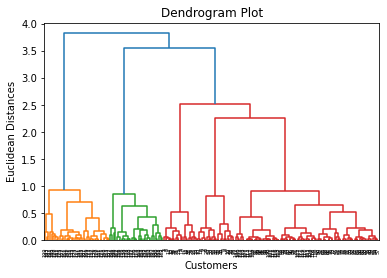

In [6]:
Z = shc.linkage(x, 'ward')
dend = shc.dendrogram(Z)
plt.title("Dendrogram Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")  

In the above lines of code, we have imported the hierarchy module of scipy library. 
This module provides us a method shc.denrogram(), which takes the linkage() as a parameter. 
The linkage function is used to define the distance between two clusters,so here we have passed 
the x(matrix of features), and method "ward," the popular method of linkage in hierarchical clustering.

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

Then we have created the object of this class named as hc. The AgglomerativeClustering class takes the following parameters:

n_clusters =5 : It defines the number of clusters, and we have taken here 5 because it is the optimal number of clusters.

affinity = 'euclidean': It is a metric used to compute the linkage.

linkage  ='ward': It defines the linkage criteria, here we have used the "ward" linkage. This method is the popular linkage method that we have already used for creating the Dendrogram. It reduces the variance in each cluster.

In [9]:
y_pred= hc.fit_predict(x)

In [10]:
hc.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

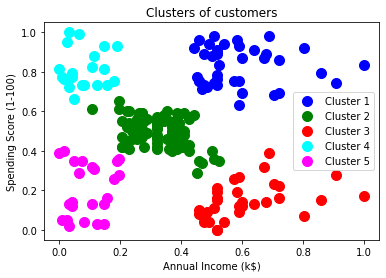

In [11]:
X = x.values
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'blue',   label = 'Cluster 1')  
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'green',  label = 'Cluster 2')  
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'red',    label = 'Cluster 3')  
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan',   label = 'Cluster 4')  
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta',label = 'Cluster 5')  
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  

Text(0, 0.5, 'Spending Score (1-100)')

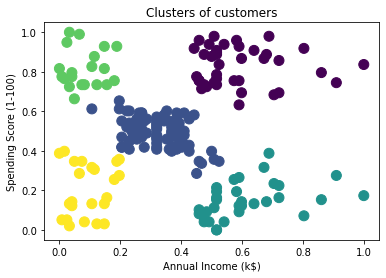

In [12]:
#another way of plotting the curve

plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=hc.labels_,s=100)
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  